# '마스크' json 데이터 읽기

In [2]:
import json

with open("C:/Users/min/Documents/SocialCom/Twitter/마스크.json", 'r') as f:
    json_data = json.load(f)

# 1. 수집된 Tweet 기초통계

## 1.1 트윗은 총 몇 개이며 트윗은 언제 만들어졌나?

In [3]:
# 환경 세팅
import pandas as pd
import seaborn as sns #시각화
import matplotlib.pyplot as plt 
import numpy as np # concatenate 등 사용
import collections # Counter 등 사용
import random

In [4]:
original_date = [data['created_at'] for data in json_data] #트윗날짜만 모아 리스트 생성

In [5]:
print(len(original_date)) #데이터 총 개수는 1100
print(original_date[0:2]) #날짜 데이터 형식 확인: 'Wed Mar 15 15:14:41 +0000 2023'

1100
['Wed Mar 15 15:14:41 +0000 2023', 'Wed Mar 15 15:14:31 +0000 2023']


In [6]:
original_date = [date.split() for date in original_date]
data_format = list(map(lambda x: x[1]+'-'+x[2]+'-'+x[5], original_date))
print(set(data_format)) #{'Mar-15-2023'}
#모든 데이터가 3월 15일자에 생성된 것

{'Mar-15-2023'}


In [7]:
#날짜가 아닌 시간을 기준으로 데이터 분포 파악
times = [x[3].split(':') for x in original_date]
print(times[0:10]) #[['15', '14', '41']]: 리스트의 각 원소가 m, s, ss 단위로 쪼개진 list형식이 됨
times = list(map(lambda x: x[0]+x[1], times))
print(times[0:10]) # 리스트의 각 원소를 list가 아닌 정수형식으로 바꿈

[['15', '14', '41'], ['15', '14', '31'], ['15', '14', '29'], ['15', '14', '26'], ['15', '14', '18'], ['15', '14', '16'], ['15', '14', '15'], ['15', '13', '58'], ['15', '13', '57'], ['15', '13', '55']]
['1514', '1514', '1514', '1514', '1514', '1514', '1514', '1513', '1513', '1513']


In [8]:
times_sorted = sorted(times) #시간순 정렬

In [9]:
times_dict = collections.Counter(times_sorted)

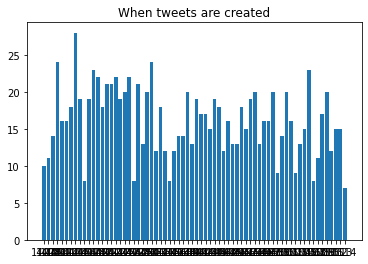

In [10]:
plt.bar(times_dict.keys(), times_dict.values())
plt.title('When tweets are created')
plt.show()

### **결론:**
**- 트윗은 총 1100개이다.**  
**- 해당 데이터 모두 2023년 3월 15일에 수집된 것이며, 시간대별 트윗의 개수가 특정 규칙이나 경향 없이 고루 퍼져 있다.**

## 1.2 각 트윗의 생성자는 언제 계정을 만들었나?

In [11]:
json_data[0]['user']

{'id': 374631713,
 'id_str': '374631713',
 'name': '새벽창가에서다',
 'screen_name': 'jjveily',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 2387,
 'friends_count': 3530,
 'listed_count': 2,
 'created_at': 'Fri Sep 16 17:08:13 +0000 2011',
 'favourites_count': 150135,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 160809,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1534979540782501888/-bGZyciQ_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/153497954078

In [12]:
users = [x['user'] for x in json_data] #트윗의 user 정보가 추출된 list 생성
print(users[0:1])

[{'id': 374631713, 'id_str': '374631713', 'name': '새벽창가에서다', 'screen_name': 'jjveily', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 2387, 'friends_count': 3530, 'listed_count': 2, 'created_at': 'Fri Sep 16 17:08:13 +0000 2011', 'favourites_count': 150135, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 160809, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1534979540782501888/-bGZyciQ_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1534979540782501888/-bGZyciQ_normal.jpg

In [13]:
user_created_at = [x['created_at'] for x in users] #user가 계정을 생성한 날짜가 추출된 list 생성
print(len(set(user_created_at))) #1043
print(user_created_at[0:1]) #['Fri Sep 16 17:08:13 +0000 2011']

1043
['Fri Sep 16 17:08:13 +0000 2011']


In [14]:
user_created_at2 = [date.split() for date in user_created_at]
user_created_at_format = list(map(lambda x: x[5], user_created_at2)) #생성 연도만 슬라이싱
print(len(set(user_created_at_format))) #16: 연도만으로도 16종류가 나옴

16


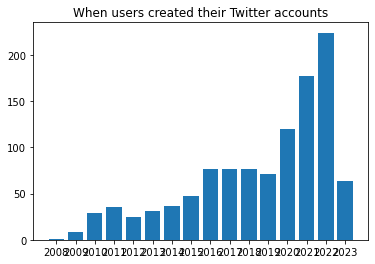

In [15]:
user_created_at_sorted = sorted(user_created_at_format) #정렬
ucas_dict = collections.Counter(user_created_at_sorted)

plt.bar(ucas_dict.keys(), ucas_dict.values())
plt.title('When users created their Twitter accounts')
plt.show()

### **결론:**
**- 3월 15일에 '마스크'에 대한 트윗을 올린 유저는 대체로 2020년 이후 트위터 계정을 만들었다. 특히 2022년에 계정을 생성한 사람의 수가 가장 많았다.**   
**- 이러한 현상의 원인을 추론해본다면, 트위터 계정을 만든지 얼마 안 되었을 때 상대적으로 더 활발하게 트윗을 올리는 등의 트위터 활동을 하기 때문이라고 짐작할 수도 있다. 즉 계정을 만든지 10년이 넘은 사용자는 트윗을 올리는 활동에 상대적으로 소홀해지는 경향이 있을 수 있다.**

## 1.3 수집된 트윗 중 가장 follower가 많은 사용자는?

In [16]:
user_followers = list(map(lambda x: (x['name'],x['followers_count']), users)) #(user의 이름: user의 follower 수)를 원소로 하는 리스트 생성
print(user_followers[0:2]) #[{'새벽창가에서다': 2387}, {'온밈': 76}]

[('새벽창가에서다', 2387), ('온밈', 76)]


In [17]:
user_followers.sort(key=lambda x: x[1], reverse=True) #follwer 수를 기준으로 내림차순 정렬
max_followers_user = user_followers[0]

print(f"'마스크'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 '{max_followers_user[0]}'이며, 팔로워 수는 총 {max_followers_user[1]}명이다.")

'마스크'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 '마술피리'이며, 팔로워 수는 총 20573명이다.


### **결론:**
**- '마스크'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 '마술피리'이며, 팔로워 수는 총 20573명이다.**  

## 1.4 수집된 트윗에서 가장 많이 나오는 해시태그는?

In [18]:
hashtags = [x['entities']['hashtags'] for x in json_data if x['entities']['hashtags'] != []] #해시태그만 추출된 리스트 생성, 단 공란은 리스트에 포함하지 않음
print(hashtags[0:3])

[[{'text': 'SBS뉴스', 'indices': [53, 59]}], [{'text': '설경구', 'indices': [60, 64]}, {'text': '하준', 'indices': [70, 73]}, {'text': '정재광', 'indices': [79, 83]}, {'text': '진선규', 'indices': [89, 93]}, {'text': '남다름', 'indices': [99, 103]}, {'text': '변요한', 'indices': [109, 113]}, {'text': '이광수', 'indices': [119, 123]}, {'text': '류경수', 'indices': [129, 133]}], [{'text': '이도현', 'indices': [25, 29]}]]


In [19]:
def extract_text(listed_dic):    
    return [x.get('text') for x in listed_dic]

In [20]:
hashtag_format = [extract_text(x) for x in hashtags] #해시태그의 텍스트만 추출된 리스트 생성
hashtags = np.concatenate(hashtag_format).tolist() #2차원 리스트를 1차원으로 축소
print(hashtags[0:3])

['SBS뉴스', '설경구', '하준']


In [21]:
ht_count = collections.Counter(hashtags)
print(ht_count,'\n')
ht_most = ht_count.most_common()
print(ht_most, '\n')
#collections 모듈의 Counter 함수 및 most_common 메소드를 이용하여 hashtag 당 출현빈도 계산
print(f"'마스크'를 주제로 한 트윗에서 가장 많이 나오는 해시태그는 {ht_most[0][0]}이며, 총 {ht_most[0][1]}회 출현하였다.")

Counter({'이도현': 28, 'NuNew': 3, '댕햄': 2, 'EVENT': 2, 'MaskSinger12': 2, 'KBS': 2, 'KBS뉴스': 2, 'SBS뉴스': 1, '설경구': 1, '하준': 1, '정재광': 1, '진선규': 1, '남다름': 1, '변요한': 1, '이광수': 1, '류경수': 1, '수성의마녀': 1, 'G_Witch': 1, '솜인덕장터': 1, '솜솜옷장터': 1, '영훈': 1, '아디다스숄더백': 1, 'SetMeFree_Pt2': 1, 'SetMeFree_Pt2_Teaser': 1, 'JISOO': 1, '지수': 1, '블랙핑크지수': 1}) 

[('이도현', 28), ('NuNew', 3), ('댕햄', 2), ('EVENT', 2), ('MaskSinger12', 2), ('KBS', 2), ('KBS뉴스', 2), ('SBS뉴스', 1), ('설경구', 1), ('하준', 1), ('정재광', 1), ('진선규', 1), ('남다름', 1), ('변요한', 1), ('이광수', 1), ('류경수', 1), ('수성의마녀', 1), ('G_Witch', 1), ('솜인덕장터', 1), ('솜솜옷장터', 1), ('영훈', 1), ('아디다스숄더백', 1), ('SetMeFree_Pt2', 1), ('SetMeFree_Pt2_Teaser', 1), ('JISOO', 1), ('지수', 1), ('블랙핑크지수', 1)] 

'마스크'를 주제로 한 트윗에서 가장 많이 나오는 해시태그는 이도현이며, 총 28회 출현하였다.


### **결론:**
**- '마스크'를 주제로 한 트윗에서 가장 많이 나오는 해시태그는 이도현이며, 총 28회 출현하였다.**  
**- 마스크 해제 정책과 관련된 해시태그가 대부분일 것이라 예상하였으나, 일부 방송국 이름이 언급된 것을 제외하고는 대부분이 마스크 정책과 직접적으로 연관되지 않은 것으로 드러났다. 특히 최다 출현 해시태그가 3월 15일 당시 국내에서 인기 있던 드라마 '더글로리'의 주연인 '이도현'인 것으로 보아, 트윗의 해시태그 내용은 사람들에게 인기 있는 사람(대상)일 가능성이 있음을 추론할 수 있다.**

# 2. Retweet 통계

In [22]:
retweets = [data for data in json_data if data['retweet_count']>0]

print(len(retweets)) #retweet 횟수가 1이상인 트윗만 추출 #총 970개

970


In [23]:
def date_format(date): #날짜 정보의 형식을 통일하기 위한 함수 생성
    date = date.split()
    return f'{date[5]}-{date[1]}-{date[2]} {date[3]}'

In [24]:
retweets_info = [{'id': data['id'], 'retweet': data['retweet_count'], 'text': data['text'], 'when': date_format(data['created_at']), 'user': data['user']['name']} for data in retweets]
# retweet 정렬을 위해 필요한 정보만 추출된 리스트 생성
print(retweets_info[0:1])

[{'id': 1636023115603116032, 'retweet': 128, 'text': 'RT @herbaday: 전 세미나에 참석했다가 쉬는 시간에 마스크 3분 가량 벗고 동료와 커피 마셨다가 코로나 확진됐어요. 세미나 내내 마스크 착용하다가 딱 그 약 3분! 여러분…마스크 계속 쓰세요…코로나…많이 아프네요. 무엇보다 이번주 계획한 일…', 'when': '2023-Mar-15 15:14:41', 'user': '새벽창가에서다'}]


In [25]:
retweets_info.sort(key= lambda x: -x['retweet']) #retweet이 많은 순으로 딕셔너리 리스트 정렬
print(retweets_info[0:2])

[{'id': 1636007688764272640, 'retweet': 16743, 'text': 'RT @Rimworldd: 마지막의 마지막까지 마스크 써야하는곳\n\n- 병원 \n이해감 당연함 그럴수있음\n\n-팬싸장\n이새낀뭐임', 'when': '2023-Mar-15 14:13:23', 'user': '차니쫑/승연🐿'}, {'id': 1636007640496246784, 'retweet': 16743, 'text': 'RT @Rimworldd: 마지막의 마지막까지 마스크 써야하는곳\n\n- 병원 \n이해감 당연함 그럴수있음\n\n-팬싸장\n이새낀뭐임', 'when': '2023-Mar-15 14:13:11', 'user': '고고'}]


In [26]:
top10_retweets = []
top10_text = []

for i in range(len(retweets_info)):
    if retweets_info[i]['text'] not in top10_text:
        top10_retweets.append(retweets_info[i])
        top10_text.append(retweets_info[i]['text'])
        if len(top10_text) == 10:
            break
    else:
        continue
        
print(top10_retweets[0:1]) #가장 많이 retweet된 트윗(중복 허용X)이 추출됨

[{'id': 1636007688764272640, 'retweet': 16743, 'text': 'RT @Rimworldd: 마지막의 마지막까지 마스크 써야하는곳\n\n- 병원 \n이해감 당연함 그럴수있음\n\n-팬싸장\n이새낀뭐임', 'when': '2023-Mar-15 14:13:23', 'user': '차니쫑/승연🐿'}]


In [27]:
for i in range(10):
    for data in json_data:
        if data['id'] == top10_retweets[i]['id']:
            top10_retweets[i]['when_first'] = date_format(data['retweeted_status']['created_at'])
            top10_retweets[i]['first_user'] = data['retweeted_status']['user']['name']
            top10_retweets[i]['followers']=data['retweeted_status']['user']['followers_count']
            top10_retweets[i]['friends']=data['retweeted_status']['user']['friends_count']
            break
        else:
            continue
            

print(top10_retweets[0])

{'id': 1636007688764272640, 'retweet': 16743, 'text': 'RT @Rimworldd: 마지막의 마지막까지 마스크 써야하는곳\n\n- 병원 \n이해감 당연함 그럴수있음\n\n-팬싸장\n이새낀뭐임', 'when': '2023-Mar-15 14:13:23', 'user': '차니쫑/승연🐿', 'when_first': '2023-Mar-15 00:04:16', 'first_user': '리무쨩', 'followers': 2130, 'friends': 120}


In [28]:
for i in range(len(top10_retweets)):
    print(f"""
리트윗 횟수가 {i+1}번째로 많은 트윗 정보는 이하와 같다.
---------------------------------------------------------------------------------------------------------------------------
➡️내용: {top10_retweets[i]['text']}

➡️리트윗 횟수: {top10_retweets[i]['retweet']}회
➡️작성자: {top10_retweets[i]['user']}
➡️작성 일시: {top10_retweets[i]['when']}

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: {top10_retweets[i]['first_user']} (팔로워: {top10_retweets[i]['followers']}명, 친구: {top10_retweets[i]['friends']}명)
➡️원본 작성 일시: {top10_retweets[i]['when_first']}
---------------------------------------------------------------------------------------------------------------------------

    """)


리트윗 횟수가 1번째로 많은 트윗 정보는 이하와 같다.
---------------------------------------------------------------------------------------------------------------------------
➡️내용: RT @Rimworldd: 마지막의 마지막까지 마스크 써야하는곳

- 병원 
이해감 당연함 그럴수있음

-팬싸장
이새낀뭐임

➡️리트윗 횟수: 16743회
➡️작성자: 차니쫑/승연🐿
➡️작성 일시: 2023-Mar-15 14:13:23

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: 리무쨩 (팔로워: 2130명, 친구: 120명)
➡️원본 작성 일시: 2023-Mar-15 00:04:16
---------------------------------------------------------------------------------------------------------------------------

    

리트윗 횟수가 2번째로 많은 트윗 정보는 이하와 같다.
---------------------------------------------------------------------------------------------------------------------------
➡️내용: RT @seanseed: 마스크 해제 이후에도 한국인들이 마스크를 쓰고 다니는 이유. https://t.co/BLHSF8U5LO

➡️리트윗 횟수: 15095회
➡️작성자: 🥥달콤x_x🍯
➡️작성 일시: 2023-Mar-15 14:17:58

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: 이상주의자 (팔로워: 609명, 친구: 126명)
➡️원본 작성 일시: 2023-Mar-15 00:45:18
--------------------------------------------------------------------------------------

### 결론
**Retweet 통계 (가장 많이 retweet된 트윗 10개에 대한 정보 및 원본 트윗에 대한 정보) 분석 결과는, 바로 상단의 코드 출력 결과와 같다.**

# 3. Tweet의 연관어 분석

In [29]:
from konlpy.tag import Okt

okt = Okt()

In [30]:
text_lst = [data['text'] for data in json_data] #트윗 텍스트만 추출한 리스트 생성
print(len(text_lst))
print(text_lst[0:2])

1100
['RT @herbaday: 전 세미나에 참석했다가 쉬는 시간에 마스크 3분 가량 벗고 동료와 커피 마셨다가 코로나 확진됐어요. 세미나 내내 마스크 착용하다가 딱 그 약 3분! 여러분…마스크 계속 쓰세요…코로나…많이 아프네요. 무엇보다 이번주 계획한 일…', 'RT @seanseed: 마스크 해제 이후에도 한국인들이 마스크를 쓰고 다니는 이유. https://t.co/BLHSF8U5LO']


## 3.1 트윗 텍스트 내 불필요한 어구(언급, url) 제거

In [31]:
text_combined = ' '.join(text_lst) #한꺼번에 진행하기 위해 여러개의 문자열 원소를 하나의 문자열 원소로 합침

In [32]:
text_split = text_combined.split()
text_phrases = [text for text in text_split if ('RT' not in text) and ('@' not in text) and ('https:' not in text)]

In [33]:
text_combined2 = ' '.join(text_phrases) #한꺼번에 진행하기 위해 여러개의 문자열 원소를 하나의 문자열 원소로 합침

## 3.2 트윗 텍스트의 품사 분석

- 한글 언어 처리는 '띄어쓰기' 및 '조사'로 인해 전처리가 까다로운 편이다.
- 형태소간 결합이 다소 복잡한 한글은 상대적으로 라틴어 계열의 언어보다 NLP 처리가 어려운 문제가 있다.
- KoNLP는 대표적인 파이썬 한글 형태소 패키지이며, 그 가운데 Okt(open-korean-text) 형태소 분석 모듈은 한글 SNS 분석에 적합한 것이다.
- Okt는 normalization, tokenization, stemming과 같은 한국어 처리를 통해 색인어를 추출해준다.  

#### pos('텍스트', norm=True, stem=True)
1. **pos: tokenization 후 각 token에 대한 품사를 분석** (ex. 처리하는 예시입니다 -> 처리Noun, 하는Verb, 예시Noun, 입니다Adjective(이다))
2. **norm: normalization 수행** (ex. 입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)
3. **stem: stemming 수행** (ex. 입니다 -> 이다)

본 프로젝트는 트윗 텍스트에 대한 연관어를 분석하는 것이므로, 필요한 단어만을 추출하고자 tokenization, normalization, stemming를 모두 진행할 것이다.  

reference: https://github.com/open-korean-text/open-korean-text

In [34]:
pos_tokens = okt.pos(text_combined2, norm=True, stem=True)

우선 트윗 텍스트에서 나타나는 명사, 형용사, 부사, 동사가 어떠한지 파악해볼 것이다.

In [35]:
noun = collections.Counter([word for word, tag in pos_tokens if (tag=='Noun') and (word != '마스크')])
print(noun.most_common(100))

[('해제', 556), ('이후', 451), ('이유', 439), ('한국인', 437), ('마지막', 298), ('병원', 154), ('팬싸', 152), ('나', 151), ('곳', 150), ('해감', 149), ('새', 149), ('뭐임', 149), ('착용', 130), ('거', 114), ('의무', 101), ('진짜', 84), ('안', 77), ('대중교통', 67), ('실물', 63), ('오세훈', 61), ('도경수', 61), ('괄치좋뜻', 61), ('병', 49), ('의원', 48), ('기절', 44), ('이제', 43), ('버스', 42), ('것', 41), ('그', 38), ('모자', 37), ('누군가', 35), ('백현', 35), ('뭐', 34), ('속보', 32), ('이', 32), ('티', 32), ('팀', 32), ('걸', 31), ('코로나', 29), ('옆선', 28), ('정부', 27), ('차', 25), ('못', 25), ('눈', 25), ('감기', 25), ('애가', 25), ('내', 24), ('요청', 24), ('불응', 24), ('대상', 24), ('아차', 24), ('동물병원', 24), ('수도', 24), ('금수', 24), ('때', 24), ('후드', 24), ('분', 24), ('완전', 23), ('등', 21), ('비', 21), ('자꾸', 20), ('지하철', 20), ('생각', 19), ('때문', 19), ('약국', 19), ('사람', 19), ('거의', 18), ('독감', 18), ('로', 18), ('삼일절', 18), ('영향', 18), ('덕분', 16), ('건보', 16), ('재정', 16), ('장르', 16), ('눈병', 15), ('비롯', 15), ('감염병', 15), ('문명', 15), ('진보', 15), ('흑자', 15), ('매년', 15), ('검사', 

noun에 '마스크'와 연관된 단어가 어느 정도 잘 추출된 것을 확인할 수 있다. (단, stopword와 품사태깅/형태소 분석이 잘못된 원소도 몇몇 있다)

In [36]:
adj = collections.Counter([word for word, tag in pos_tokens if (tag=='Adjective')])
print(adj.most_common(100))

[('그렇다', 191), ('당연하다', 150), ('있다', 115), ('빨갛다', 64), ('사이좋다', 61), ('없다', 54), ('아니다', 53), ('많다', 27), ('예쁘다', 26), ('헷갈리다', 24), ('귀엽다', 18), ('같다', 16), ('좋다', 13), ('야하다', 13), ('얇다', 12), ('훌륭하다', 11), ('아프다', 8), ('어떻다', 6), ('답답하다', 6), ('이렇다', 5), ('미미하다', 5), ('미치다', 5), ('괜찮다', 4), ('미안하다', 4), ('좋아하다', 4), ('확실하다', 3), ('무섭다', 3), ('안되다', 3), ('높다', 3), ('가능하다', 3), ('엉뚱하다', 3), ('재밌다', 3), ('나쁘다', 3), ('싫다', 3), ('맛있다', 3), ('편하다', 3), ('힘들다', 3), ('빡치다', 3), ('행복하다', 2), ('귀찮다', 2), ('덥다', 2), ('희다', 2), ('기쁘다', 2), ('멍청하다', 2), ('이뿌다', 2), ('스럽다', 2), ('신나다', 2), ('상관없다', 2), ('밉다', 2), ('급하다', 2), ('촉촉하다', 2), ('따뜻하다', 2), ('똑같다', 1), ('여전하다', 1), ('불쾌하다', 1), ('허전하다', 1), ('어렵다', 1), ('유일하다', 1), ('빠르다', 1), ('신속하다', 1), ('편안하다', 1), ('이다', 1), ('짧다', 1), ('그만하다', 1), ('착실하다', 1), ('잡다하다', 1), ('의하다', 1), ('낮다', 1), ('더럽다', 1), ('아름답다', 1), ('멀다', 1), ('야무지다', 1), ('짜증나다', 1), ('이상하다', 1), ('수상하다', 1), ('사랑스럽다', 1), ('잘생기다', 1), ('대단하다', 1), ('낑기다', 1), ('슬프다', 1), (

형용사의 경우 추출된 단어만 보았을 때에는, tokeization, stemming까지 진행하였기 때문인지 실제 트윗이 전하고자 했던 메시지가 제대로 반영되지 않았다고 판단하였다. 예컨대 '당연하지 않아' 혹은 '안 예쁘네'라는 트윗에서 부정 감정을 직접 드러내는 형용사가 추출되었다기보다는 '당연하다'와 '예쁘다'와 같은 긍정단어가 추출되었다. 실제로 형용사를 추출한 리스트인 adj 리스트에는 긍정 단어와 부정 단어가 비슷한 비율로 혼재해있는 것을 볼 수 있다.  

In [37]:
adv = collections.Counter([word for word, tag in pos_tokens if (tag=='Adverb')])
print(adv.most_common(100))

[('너무', 61), ('근데', 36), ('이렇게', 27), ('다', 19), ('많이', 17), ('그만큼', 15), ('그래서', 11), ('맨날', 5), ('딱', 4), ('같이', 4), ('꼬옥', 4), ('어떻든', 3), ('되게', 3), ('없이', 3), ('아무리', 2), ('그래도', 2), ('드디어', 2), ('열심히', 2), ('엄청', 2), ('특히', 2), ('함께', 2), ('아무래도', 2), ('아직', 2), ('가만', 1), ('다닥다닥', 1), ('왠지', 1), ('이미', 1), ('으', 1), ('어디서', 1), ('언제나', 1), ('걸걸', 1), ('또는', 1), ('우', 1), ('아직도', 1), ('곧이어', 1), ('연신', 1), ('아주아주', 1), ('저렇게', 1), ('이리', 1), ('앙', 1), ('긍데', 1), ('물론', 1), ('걍', 1), ('어쩔', 1), ('그걸', 1)]


부사의 경우 형용사 리스트(adj)에서 발견된 것과 비슷한 문제가 발견되었지만, 분석 전에는 형용사보다 '마스크'에 대한 정보가 더 적게 나타날 것이라고 예상한 것과 달리 오히려 마스크 착용에 대한 태도를 얕게나마 예측할 수 있는 단어가 몇몇 발견되기도 하였다.  
예컨대 '너무', '맨날', '드디어', '아무리', '열심히', 아직도' 등등의 단어를 통해 기존 마스크 정책을 엄수하면서도 이에 대한 불만이 드러남을 예측할 수 있다.  
물론, 단어 개수가 적은 편이며 정확한 맥락을 파악하기 어렵기에 일반화하거나 단정짓는 데는 위험이 있다.

In [38]:
verb = collections.Counter([word for word, tag in pos_tokens if tag=='Verb'])
print(verb.most_common(100))

[('쓰다', 493), ('다니다', 457), ('하다', 216), ('써다', 200), ('끼다', 155), ('보다', 150), ('되다', 106), ('쓸다', 86), ('벗다', 54), ('나다', 39), ('생기다', 29), ('보이다', 27), ('되어다', 26), ('타다', 26), ('신다', 24), ('내다', 22), ('나오다', 20), ('사라지다', 18), ('걸리다', 15), ('주다', 14), ('모르다', 13), ('가다', 13), ('알다', 12), ('읽다', 12), ('여기다', 12), ('뭐라다', 12), ('찾다', 11), ('입다', 11), ('누르다', 11), ('생각나다', 11), ('않다', 10), ('자다', 10), ('오다', 9), ('맞다', 8), ('지키다', 8), ('내리다', 8), ('들다', 7), ('버리다', 7), ('풀리다', 7), ('챙기다', 7), ('그리다', 7), ('돼다', 6), ('이르다', 6), ('남다', 6), ('웃다', 6), ('듣다', 6), ('싶다', 6), ('웃기다', 6), ('앉다', 5), ('바뀌다', 5), ('먹다', 5), ('넘다', 5), ('만들다', 5), ('지다', 5), ('받다', 5), ('쉬다', 4), ('띄다', 4), ('살다', 4), ('해주다', 4), ('만나다', 4), ('믿다', 4), ('찍다', 4), ('들어오다', 4), ('두다', 4), ('드리다', 4), ('바르다', 4), ('마시다', 3), ('쓴다', 3), ('허다', 3), ('뺏다', 3), ('죽다', 3), ('이다', 3), ('버티다', 3), ('씻다', 3), ('갖다', 3), ('틀다', 3), ('알아보다', 3), ('치다', 3), ('뜨다', 3), ('넣다', 3), ('감추다', 3), ('돌리다', 2), ('파다', 2), ('크다', 2), 

동사 분석 결과 '마스크'와 직접 관련된 '쓰다', '다니다', '하다', '끼다' 등이 나오지만, 형용사와 마찬가지로 연관어로 중요한 메시지를 전달해주지 않는 듯 보인다.

## 3.3 품사별 WordCloud 통해 연관어 파악

'마스크'에 대한 트윗 텍스트를 품사별로 분류해본 결과 상대적으로 명사가 나머지 품사에 비해 마스크'와 연관된 정보를 더 잘 제공해주는 편이라고 판단하였다.   

이에, '마스크' 트윗에서의 명사 부분을 WordCloud로 시각화 해보고자 한다.

### 3.3.1 stopwords 제거
본격적인 시각화에 앞서 WordCloud가 보다 더 명확한 정보를 전달할 수 있도록, **stopword를 제거**하고자 한다.  
stopword 선별 기준은 본 텍스트에서의 '출현 빈도가 높지만 의미가 적은', '명사로 분류된 것'이다.

In [39]:
stopwords = ['나', '곳', '거', '안', '것', '그', '뭐', '이', '티', '팀', '걸', '못', '분', '등', '비', '로', '임', '칙', '팩', '더']

In [40]:
#noun에서 stopwords 필터링
noun_filter = collections.Counter([word for word, tag in pos_tokens if (tag=='Noun') and (word != '마스크') and word not in stopwords])

### 3.3.2 WordCloud

In [41]:
from PIL import Image
from wordcloud import WordCloud
font_path = 'C:/Users/min/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Bold.otf'

### Hey Twitter, what nouns are related to '마스크'?

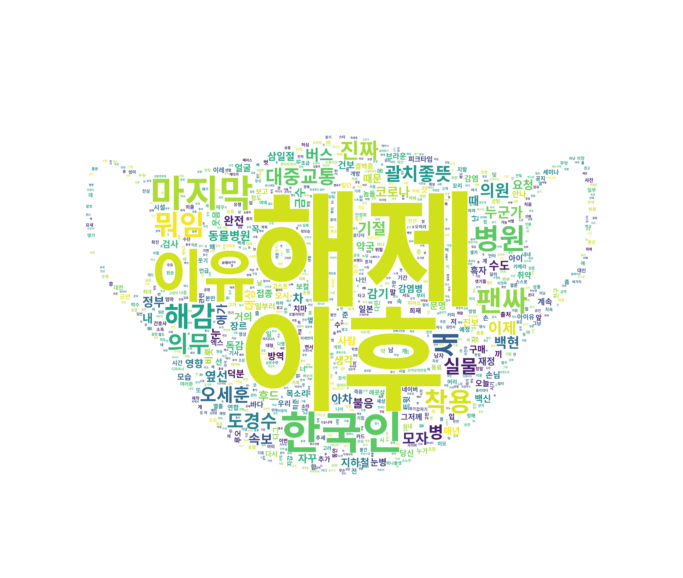

In [42]:
def makeImage(text):
    black_mask = np.array(Image.open('C:/Users/min/Documents/SocialCom/Twitter/b_mask.jpg'))

    wc = WordCloud(font_path = font_path, background_color="white", max_words=1000, mask=black_mask, margin=2)
    
    dictionary = dict(text)
    wc.generate_from_frequencies(dictionary)
    
    plt.figure(figsize = (12,12))
    
    plt.imshow(wc, interpolation="bilinear")

    plt.axis("off")
    plt.show()
    

makeImage(noun_filter)